In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt


# generate x's, y's for function w/ domain [1..10]
x_s = np.linspace(0,10,1000)
y_s = -1*(np.sin(2*x_s) + x_s**1.2 - x_s**1.25 + np.cos(3*x_s))
z_s = -1*(np.sin(1.5*x_s) + x_s**1.4 - x_s**1.1 + np.cos(2*x_s))
# normalize y's to range [0..1]
y_s = (y_s - np.min(y_s))/(np.max(y_s) - np.min(y_s))
z_s = (z_s - np.min(z_s))/(np.max(z_s) - np.min(z_s))
# print(x_s)
# print(y_s)
# print(z_s)

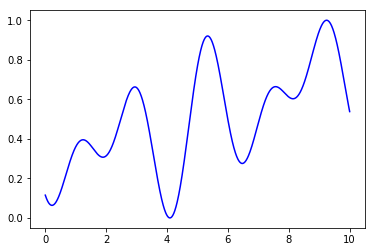

In [2]:
plt.plot(x_s,y_s,'b')

(1000,)
(1000, 1)
(1000,)


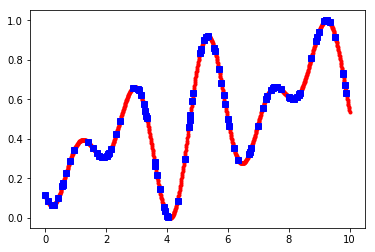

In [3]:
print(x_s.shape)
# make x_s into a column vector for TF
x_s = np.reshape(x_s,[-1,1])
# shuffle - then split into train and test
rnd_inds = np.arange(len(x_s))
np.random.shuffle(rnd_inds)
print(x_s.shape)
print(y_s.shape)
# print(rnd_inds)
x_s = x_s[rnd_inds,:]
y_s = y_s[rnd_inds]
X_train = x_s[:900]
y_train = y_s[:900]
X_test = x_s[900:]
y_test = y_s[900:]

plt.plot(X_train,y_train,'r.')
plt.plot(X_test,y_test,'bs')

In [4]:
# take validation set from training data
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]

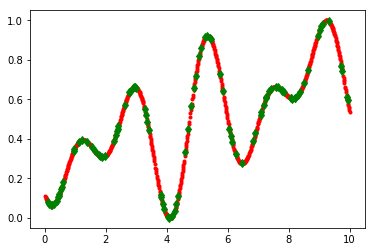

In [5]:
plt.plot(X_train,y_train,'r.')
plt.plot(X_valid,y_valid,'gd')

In [6]:
num_epochs = int(1e6)

batch_size = 1 # NOTE: ONLY SEEMS TO WORK W/ BATCH SIZE 1

n_inputs = 1
n_outputs = 1
num_nodes_l1 = 100 # I was wrong - 100 is better than 10 for a 1e6 epochs
num_nodes_l2 = 100

In [7]:
xs = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
ys = tf.placeholder(tf.float32, shape=(None), name="y") 

In [8]:
hidden1 = tf.layers.dense(xs, num_nodes_l1, name="hidden1",
                              activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, num_nodes_l2, name="hidden2",
                              activation=tf.nn.relu)
outputs = tf.layers.dense(hidden2, n_outputs, name="outputs")

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [9]:
cost = tf.reduce_mean(tf.square(outputs-ys))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(num_epochs):
        # print out progress
        if not(i%(10000)):
            print(i)
        # select random subsets of data to train on (aka batches)
        rnd_idx = np.random.permutation(len(X_train))[:batch_size]
        X_batch = X_train[rnd_idx]
        y_batch = y_train[rnd_idx]
        sess.run(train, feed_dict={xs: X_batch, ys: y_batch})
        
    # generate predicted output values for y
    pred_ys = sess.run(outputs, feed_dict={xs:X_test})

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


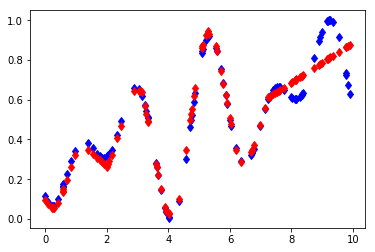

In [11]:
plt.plot(X_test,y_test,'bd')
plt.plot(X_test,pred_ys,'rd')

In [2]:
####3D STARTS HERE#####3
from mpl_toolkits import mplot3d

# generate x's, y's for function w/ domain [1..10]
x_s = np.linspace(0,10,1000)
y_s = -1*(np.sin(2*x_s) + x_s**1.2 - x_s**1.25 + np.cos(3*x_s))
z_s = -1*(np.sin(1.5*x_s) + x_s**1.4 - x_s**1.1 + np.cos(2*x_s))
# normalize y's to range [0..1]
y_s = (y_s - np.min(y_s))/(np.max(y_s) - np.min(y_s))
z_s = (z_s - np.min(z_s))/(np.max(z_s) - np.min(z_s))
# print(x_s)
# print(y_s)
# print(z_s)

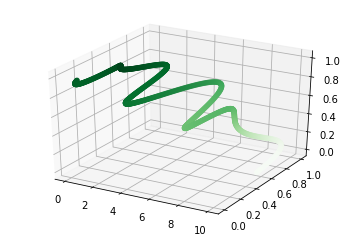

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_s, y_s, z_s, c=z_s, cmap='Greens')

(1000,)
(1000, 1)
(1000,)


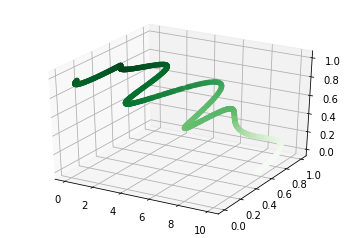

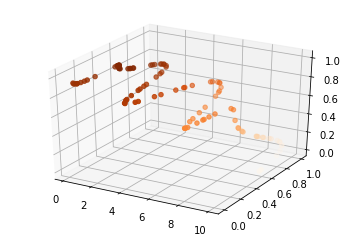

In [4]:
print(x_s.shape)
# make x_s into a column vector for TF
x_s = np.reshape(x_s,[-1,1])
# shuffle - then split into train and test
rnd_inds_y = np.arange(len(x_s))
np.random.shuffle(rnd_inds_y)
print(x_s.shape)
print(y_s.shape)
# print(rnd_inds)
x_s = x_s[rnd_inds_y,:]
y_s = y_s[rnd_inds_y]
z_s = z_s[rnd_inds_y]
X_train = x_s[:900]
y_train = y_s[:900]
z_train = z_s[:900]
X_test = x_s[900:]
y_test = y_s[900:]
z_test = z_s[900:]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train, y_train, z_train, c=z_train, cmap='Greens')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_test, y_test, z_test, c=z_test, cmap='Oranges')

In [5]:
# take validation set from training data
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]
z_valid, z_train = z_train[:100], z_train[100:]

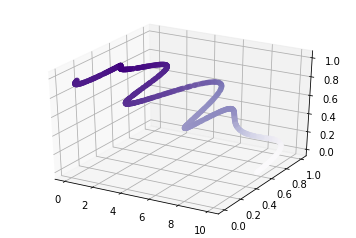

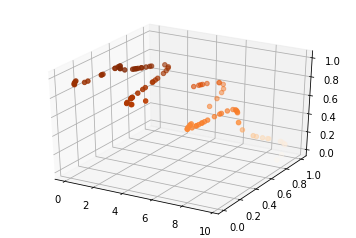

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train,y_train, z_train, c=z_train, cmap='Purples')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_valid,y_valid, z_valid, c=z_valid, cmap='Oranges')

In [7]:
num_epochs = 1000000
# int(1e6)

batch_size = 1 # NOTE: ONLY SEEMS TO WORK W/ BATCH SIZE 1

n_inputs = 1
n_outputs = 1
num_nodes_l1 = 100 # I was wrong - 100 is better than 10 for a 1e6 epochs
num_nodes_l2 = 100

In [8]:
xs = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
ys = tf.placeholder(tf.float32, shape=(None), name="y") 
zs = tf.placeholder(tf.float32, shape=(None), name="z") 

In [9]:
hidden1 = tf.layers.dense(xs, num_nodes_l1, name="hidden1",
                              activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, num_nodes_l2, name="hidden2",
                              activation=tf.nn.relu)
outputs = tf.layers.dense(hidden2, n_outputs, name="outputs")

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [10]:
cost = tf.reduce_mean(tf.square(outputs-ys))
train = tf.train.AdamOptimizer(0.0001).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(num_epochs):
        # print out progress
        if not(i%(10000)):
            print(i)
        # select random subsets of data to train on (aka batches)
        rnd_idx = np.random.permutation(len(X_train))[:batch_size]
        X_batch = X_train[rnd_idx]
        y_batch = y_train[rnd_idx]
        z_batch = z_train[rnd_idx]
        sess.run(train, feed_dict={xs: X_batch, ys: y_batch, zs: z_batch})
        
    # generate predicted output values for y
    pred_ys = sess.run(outputs, feed_dict={xs:X_test})
    pred_zs = sess.run(outputs, feed_dict={xs:X_test})

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


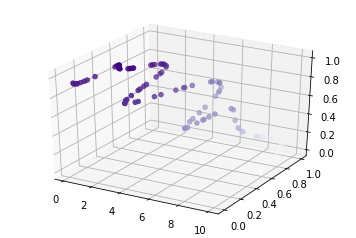

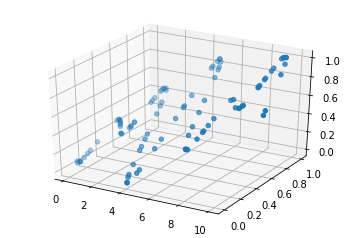

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_test, y_test, z_test, c = z_test, cmap='Purples')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_test, pred_ys, pred_zs, cmap='Oranges')